In [57]:
import cv2
import os
import numpy as np
from keras_facenet import FaceNet

rostos_path = 'rostos/'
dataset_path = 'dataset/'

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []    

    def extract_face(self, filename):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face_arr = cv2.resize(img, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        path = self.directory +'/'
        FACES = self.load_faces(path)
        labels = [1]
        print(f"Loaded successfully: {len(labels)}")
        self.X.extend(FACES)
        self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


faceloading = FACELOADING("rostos")
X, Y = faceloading.load_classes()


# modelo de extração de caracteristicas faciais (FaceNet)
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)


EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

Loaded successfully: 1
1/1 [==============================] - 0s 62ms/step


In [58]:
print(EMBEDDED_X.shape)

(302, 512)


In [76]:
from sklearn.cluster import DBSCAN

# Defina os hiperparâmetros do DBSCAN
eps = 0.5  # Ajuste conforme necessário
min_samples = 5  # Ajuste conforme necessário

# Aplicar DBSCAN para clusterização
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(EMBEDDED_X)

In [77]:
# Encontre os clusters únicos
unique_clusters = np.unique(cluster_labels)
print(len(unique_clusters))

37


In [82]:
# Encontre os rótulos únicos dos clusters (ignorando o rótulo de ruído, que é -1)
unique_labels = np.unique(cluster_labels[cluster_labels != -1])

In [83]:
len(unique_labels)

36

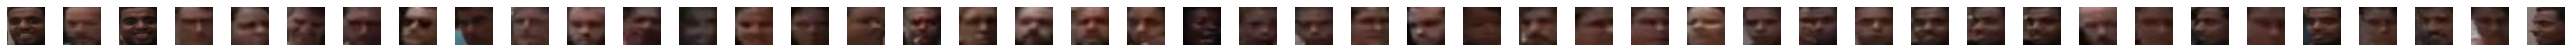

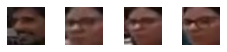

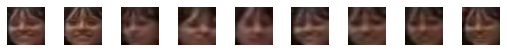

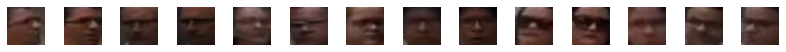

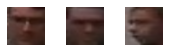

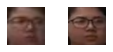

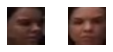

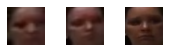

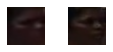

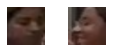

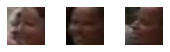

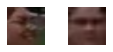

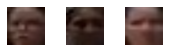

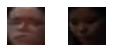

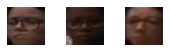

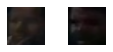

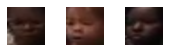

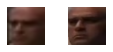

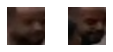

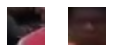

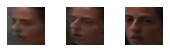

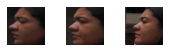

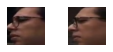

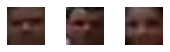

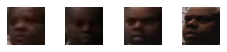

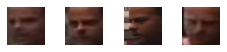

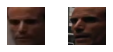

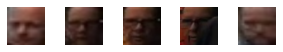

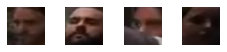

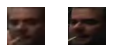

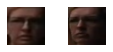

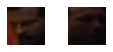

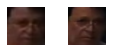

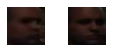

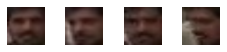

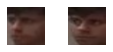

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Suponha que 'cluster_labels' contenha os rótulos de cluster atribuídos pelo DBSCAN

# Encontre os rótulos únicos dos clusters (ignorando o rótulo de ruído, que é -1)
unique_labels = np.unique(cluster_labels[cluster_labels != -1])

# Defina o tamanho da altura das imagens
image_height = 30

# Percorra cada cluster e exiba as imagens associadas a ele
for i, label in enumerate(unique_labels):
    cluster_indices = np.where(cluster_labels == label)[0]  # Índices dos elementos no cluster
    cluster_images = X[cluster_indices]  # Imagens correspondentes ao cluster

    # Crie uma figura para exibir os clusters
    plt.figure(figsize=(len(cluster_images), image_height))  # Ajuste o tamanho da figura conforme necessário

    # Exiba as imagens do cluster horizontalmente
    for j, image in enumerate(cluster_images):
        if j > 200:
            break
        plt.subplot(len(unique_labels), len(cluster_images), i * len(cluster_images) + j + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.show()